In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

##### 1.	Consider the dataset given below, and find out whether BMI and gender affects the Sales [Hint: Use group by and stack to create a bar plot]  , Create the Dataframe with following table

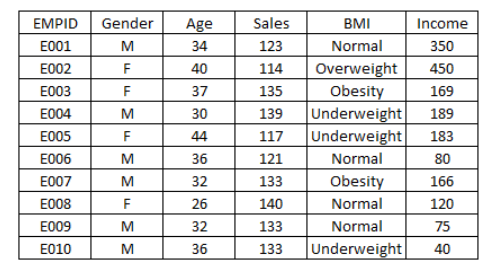

##### Functions/libraries used here : pandas

In [14]:
data={'EMPID':['E001','E002','E003','E004','E005','E006','E007','E008','E009','E010'],
     'Gender':['M','F','F','M','F','M','M','F','M','M'],
     'Age':[34,40,37,30,44,36,32,26,32,36],
    'Sales':[123,114,135,139,117,121,133,140,133,133],
    'BMI':['Normal','Overweight','Obesity','Underweight','Underweight','Normal','Obesity','Normal','Normal','Underweight'],
    'Income':[350,450,169,189,183,80,166,120,75,40]}    

In [15]:
data_df=pd.DataFrame(data)

In [16]:
data_df.head()

,EMPID,Gender,Age,Sales,BMI,Income
0,E001,M,34,123,Normal,350
1,E002,F,40,114,Overweight,450
2,E003,F,37,135,Obesity,169
3,E004,M,30,139,Underweight,189
4,E005,F,44,117,Underweight,183


In [17]:
##Method 1

In [18]:
var = data_df.groupby(['BMI','Gender'])
list(var)

[(('Normal', 'F'),
    EMPID Gender  Age  Sales     BMI  Income
  7  E008      F   26    140  Normal     120),
 (('Normal', 'M'),
    EMPID Gender  Age  Sales     BMI  Income
  0  E001      M   34    123  Normal     350
  5  E006      M   36    121  Normal      80
  8  E009      M   32    133  Normal      75),
 (('Obesity', 'F'),
    EMPID Gender  Age  Sales      BMI  Income
  2  E003      F   37    135  Obesity     169),
 (('Obesity', 'M'),
    EMPID Gender  Age  Sales      BMI  Income
  6  E007      M   32    133  Obesity     166),
 (('Overweight', 'F'),
    EMPID Gender  Age  Sales         BMI  Income
  1  E002      F   40    114  Overweight     450),
 (('Underweight', 'F'),
    EMPID Gender  Age  Sales          BMI  Income
  4  E005      F   44    117  Underweight     183),
 (('Underweight', 'M'),
    EMPID Gender  Age  Sales          BMI  Income
  3  E004      M   30    139  Underweight     189
  9  E010      M   36    133  Underweight      40)]

In [20]:
sum_sales = var.Sales.sum()
sum_sales

BMI          Gender
Normal       F         140
             M         377
Obesity      F         135
             M         133
Overweight   F         114
Underweight  F         117
             M         272
Name: Sales, dtype: int64

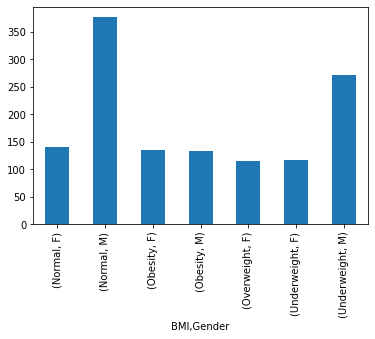

In [16]:
sum_sales.plot(kind = 'bar')

In [18]:
sum_sales.unstack()

Gender,F,M
BMI,,
Normal,140.0,377.0
Obesity,135.0,133.0
Overweight,114.0,NaN
Underweight,117.0,272.0


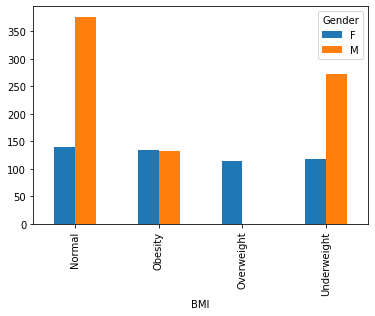

In [19]:
sum_sales.unstack().plot(kind = 'bar')

In [ ]:
#Method 2

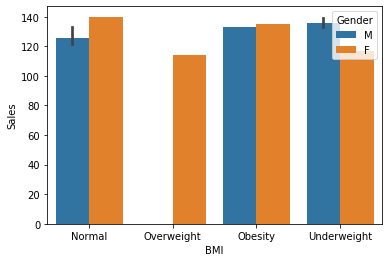

In [20]:
sns.barplot(x = "BMI", y="Sales", hue = "Gender", data = data_df)

#### 2.	Create a dataset with Name column containing Title, First Name, Middle Name and Last Name. Separate out titles from the Name and create a separate column to store the titles.
##### Functions/libraries used here: pandas, lambda, split, looping

In [21]:
import pandas as pd
import os

In [22]:
os.chdir("D://GreatLearning//NPV-Learning_Intervention//NPV//Scenario based Questions")

In [23]:
# Using Titanic Dataset

train=pd.read_csv('train_titanic_ques_2_npv.csv')

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
#Solution

In [26]:
Names = train['Name']

In [27]:
first_names = Names.apply(lambda x:x.split(', ')[-1])

In [29]:
first_names.head()

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
3            Mrs. Jacques Heath (Lily May Peel)
4                             Mr. William Henry
Name: Name, dtype: object

In [30]:
titles = first_names.apply(lambda x:x.split('.')[0])

In [31]:
train['Titles'] = titles

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


##### 3. For above used Titanic Dataset, Create Pivot table for the following functionalities:
1. Use Sex as index parameter for the pivot table
2. Plot the table
3. Use Sex and Pclass as index parameter for the pivot table
4. Apply different aggregation functions for the above pivot table.
5. Use Sex and Pclass as index parameter for pivot table and apply mean function on Survived
6. Use Sex and Embarked as index parameter for pivot table and apply mean function on Fare   
7. Use Sex and Embarked as index parameter for pivot table and apply min,max,mean function on Fare

##### Topics Covered here : Pivot Table

In [33]:
#1. Use Sex as index parameter for the pivot table
# To get the accurate results drop columns which are not required
train.drop(['PassengerId','Ticket','Name'],inplace=True,axis=1)

pivot_table=pd.pivot_table(train, index=['Sex'])
print(pivot_table)

              Age       Fare     Parch    Pclass     SibSp  Survived
Sex                                                                 
female  27.915709  44.479818  0.649682  2.159236  0.694268  0.742038
male    30.726645  25.523893  0.235702  2.389948  0.429809  0.188908


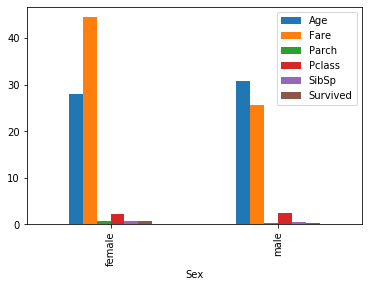

In [34]:
#2. Plot the table 
pivot_table.plot(kind='bar')

In [35]:
#3. Use Sex and Pclass as index parameter for the pivot table
pivot_titanic_1=pd.pivot_table(train,index=['Sex','Pclass'])
print(pivot_titanic_1)

                     Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447


In [38]:
 #4. Apply different aggregation functions for the above pivot table.
pivot_titanic_2 = pd.pivot_table(train, index = ['Sex','Pclass'],aggfunc = {'Age' : np.mean,'Survived':np.sum})

In [ ]:
#5. Use Sex and Pclass as index parameter for pivot table and apply mean function on Survived

In [40]:
pivot_titanic_3 = pd.pivot_table(train, index=['Sex','Pclass'],values=['Survived'],aggfunc=np.mean)
pivot_titanic_3


Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [ ]:
#6. Use Sex and Embarked as index parameter for pivot table and apply mean function on Fare 

In [41]:
pivot_titanic_4 = train.pivot_table(values= 'Fare', index= ['Sex', 'Embarked'])
pivot_titanic_4

Fare
Sex    Embarked           
female C         75.169805
       Q         12.634958
       S         38.740929
male   C         48.262109
       Q         13.838922
       S         21.711996

In [ ]:
#7 Use Sex and Embarked as index parameter for pivot table and apply min,max,mean function on Fare

In [42]:
pivot_titanic_5 = pd.pivot_table(train,values='Fare', index=['Sex','Embarked'], 
                                 aggfunc=[np.min, np.max,np.mean])

pivot_titanic_5

amin      amax       mean
                   Fare      Fare       Fare
Sex    Embarked                             
female C         7.2250  512.3292  75.169805
       Q         6.7500   90.0000  12.634958
       S         7.2500  263.0000  38.740929
male   C         4.0125  512.3292  48.262109
       Q         6.7500   90.0000  13.838922
       S         0.0000  263.0000  21.711996

##### 4. Refer above question and apply Stacking & Unstacking and Melting on the Pivot Tables.
##### Topics covered here : Stack, Unstack, Melt

In [43]:
pivot_table

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.915709,44.479818,0.649682,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,2.389948,0.429809,0.188908


In [44]:
#1
pivot_stack=pivot_table.stack()
print(pivot_stack)

Sex             
female  Age         27.915709
        Fare        44.479818
        Parch        0.649682
        Pclass       2.159236
        SibSp        0.694268
        Survived     0.742038
male    Age         30.726645
        Fare        25.523893
        Parch        0.235702
        Pclass       2.389948
        SibSp        0.429809
        Survived     0.188908
dtype: float64


In [49]:
print(pivot_titanic_1)
# 3 Sex,P Class on all other Attributes
pivot_titanic_1_stack=pivot_titanic_1.stack()
print(pivot_titanic_1_stack)
pivot_titanic_1_unstack=pivot_titanic_1.unstack()
print(pivot_titanic_1_unstack)

                     Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447
Sex     Pclass          
female  1       Age          34.611765
                Fare        106.125798
                Parch         0.457447
                SibSp         0.553191
                Survived      0.968085
        2       Age          28.722973
                Fare         21.970121
                Parch         0.605263
                SibSp         0.486842
                Survived      0.921053
        3       Age          21.750000
          

In [50]:
 #4.
print(pivot_titanic_2)
pivot_titanic_2_stack=pivot_titanic_2.stack()
print(pivot_titanic_2_stack)

pivot_titanic_2_unstack=pivot_titanic_2.unstack()
print(pivot_titanic_2_unstack)

                     Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47
Sex     Pclass          
female  1       Age         34.611765
                Survived    91.000000
        2       Age         28.722973
                Survived    70.000000
        3       Age         21.750000
                Survived    72.000000
male    1       Age         41.281386
                Survived    45.000000
        2       Age         30.740707
                Survived    17.000000
        3       Age         26.507589
                Survived    47.000000
dtype: float64
              Age                       Survived        
Pclass          1          2          3        1   2   3
Sex                                                     
female  34.611765  28.722973  21.750000       91  70 

In [51]:
# 7
print(pivot_titanic_5)
pivot_titanic_5_unstack=pivot_titanic_5.unstack()
print(pivot_titanic_5_unstack)
pivot_titanic_5_stack=pivot_titanic_5.stack()
print(pivot_titanic_5_stack)

                      max       mean     min
                     Fare       Fare    Fare
Sex    Embarked                             
female C         512.3292  75.169805  7.2250
       Q          90.0000  12.634958  6.7500
       S         263.0000  38.740929  7.2500
male   C         512.3292  48.262109  4.0125
       Q          90.0000  13.838922  6.7500
       S         263.0000  21.711996  0.0000
               max                    mean                           min  \
              Fare                    Fare                          Fare   
Embarked         C     Q      S          C          Q          S       C   
Sex                                                                        
female    512.3292  90.0  263.0  75.169805  12.634958  38.740929  7.2250   
male      512.3292  90.0  263.0  48.262109  13.838922  21.711996  4.0125   

                      
                      
Embarked     Q     S  
Sex                   
female    6.75  7.25  
male      6.75  0.00  


In [45]:
pivot_titanic_3

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [46]:
# Apply melt on pivot_titanic_3
print(pd.melt(pivot_titanic_3))
#print(pd.melt(pivot_titanic_5))

   variable     value
0  Survived  0.968085
1  Survived  0.921053
2  Survived  0.500000
3  Survived  0.368852
4  Survived  0.157407
5  Survived  0.135447


##### 5. Consider the two Datasets given , perform following operations:
1. Given an excel sheet: America Data, read and load the sheets
2. Merge the datasets : north_america and south_america
3. Merge the datasets of the years 2011 to 2015
4. Plot the Average Labor hours per year for all the years from 2000 to 2015
5. Merge America and Asia Datasets and analyze.

##### Topics Covered here :Concat, Merge, Join

In [47]:
1. # Load the datasets
df_all=pd.read_excel('America Data_ques_5_npv.xlsx',sheet_name=None,index_col=0)

In [48]:
type(df_all)

collections.OrderedDict

In [49]:
df_all.keys()

odict_keys(['north_america_2000_2010', 'south_america_2000_2010', 'am_2011', 'am_2012', 'am_2013', 'am_2014', 'am_2015', 'asia_2000_2015'])

In [50]:
df_all['am_2011']

,2011
Country,
Canada,1700.0
Chile,2047.4
Mexico,2250.2
USA,1786.0


In [51]:
df_all['north_america_2000_2010']

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0


In [52]:
#2
south=pd.read_excel('America Data_ques_5_npv.xlsx',sheet_name='south_america_2000_2010',index_col=0)
north=pd.read_excel('America Data_ques_5_npv.xlsx',sheet_name='north_america_2000_2010',index_col=0)

In [53]:
am_2000_2010 = pd.concat(objs = [south,north],axis=0)
am_2000_2010

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,
Chile,2263.0,2242.0,2250.0,2235.0,2232.0,2157,2165.0,2128.0,2095,2074.0,2069.6
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0


In [2]:
#3
am_2011=pd.read_excel('America Data_ques_5_npv.xlsx',sheet_name='am_2011',index_col=0)
am_2012=pd.read_excel('America Data_ques_5_npv.xlsx',sheet_name='am_2012',index_col=0)
am_2013=pd.read_excel('America Data_ques_5_npv.xlsx',sheet_name='am_2013',index_col=0)
am_2014=pd.read_excel('America Data_ques_5_npv.xlsx',sheet_name='am_2014',index_col=0)
am_2015=pd.read_excel('America Data_ques_5_npv.xlsx',sheet_name='am_2015',index_col=0)

In [3]:
am_2011_2015 = pd.concat(objs = [am_2011,am_2012,am_2013,am_2014,am_2015], axis = 1)
am_2011_2015

,2011,2012,2013,2014,2015
Country,,,,,
Canada,1700.0,1713.0,1707.0,1703.0,1706.0
Chile,2047.4,2024.0,2015.3,1990.1,1987.5
Mexico,2250.2,2225.8,2236.6,2228.4,2246.4
USA,1786.0,1789.0,1787.0,1789.0,1790.0


In [57]:
america = pd.merge(am_2000_2010,am_2011_2015,on = 'Country')
america

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Chile,2263.0,2242.0,2250.0,2235.0,2232.0,2157,2165.0,2128.0,2095,2074.0,2069.6,2047.4,2024.0,2015.3,1990.1,1987.5
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0,1700.0,1713.0,1707.0,1703.0,1706.0
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4,2250.2,2225.8,2236.6,2228.4,2246.4
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0,1786.0,1789.0,1787.0,1789.0,1790.0


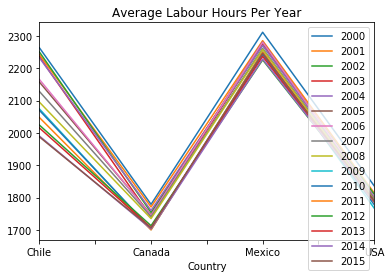

In [58]:
america.plot(title="Average Labour Hours Per Year")

In [59]:
import matplotlib.pyplot as plt

In [61]:
am_t = america.transpose()
am_t

Country,Chile,Canada,Mexico,USA
2000,2263.0,1779.0,2311.2,1836.0
2001,2242.0,1771.0,2285.2,1814.0
2002,2250.0,1754.0,2271.2,1810.0
2003,2235.0,1740.0,2276.5,1800.0
2004,2232.0,1760.0,2270.6,1802.0
2005,2157.0,1747.0,2281.0,1799.0
2006,2165.0,1745.0,2280.6,1800.0
2007,2128.0,1741.0,2261.4,1798.0
2008,2095.0,1735.0,2258.0,1792.0
2009,2074.0,1701.0,2250.2,1767.0


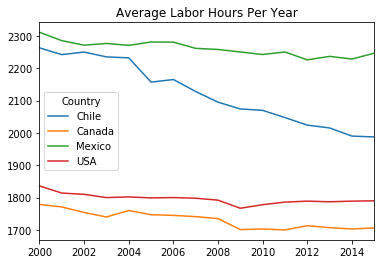

In [60]:
america.transpose().plot(title='Average Labor Hours Per Year')
plt.show()

In [62]:
asia = pd.read_excel('America Data_ques_5_npv.xlsx',sheet_name='asia_2000_2015',index_col = 0)

In [63]:
asia

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Israel,2017,1979,1993,1974,1942,1931,1919,1931,1929,1927,1918,1920,1910,1867,1853,1858
Japan,1821,1809,1798,1799,1787,1775,1784,1785,1771,1714,1733,1728,1745,1734,1729,1719
Korea,2512,2499,2464,2424,2392,2351,2346,2306,2246,2232,2187,2090,2163,2079,2124,2113
Russia,1982,1980,1982,1993,1993,1989,1998,1999,1997,1974,1976,1979,1982,1980,1985,1978


In [64]:
america_asia=pd.concat(objs=[america,asia],join='inner',axis=0,ignore_index=False)
print(america_asia)
america_asia.shape

           2000    2001    2002    2003    2004  2005    2006    2007  2008  \
Country                                                                       
Chile    2263.0  2242.0  2250.0  2235.0  2232.0  2157  2165.0  2128.0  2095   
Canada   1779.0  1771.0  1754.0  1740.0  1760.0  1747  1745.0  1741.0  1735   
Mexico   2311.2  2285.2  2271.2  2276.5  2270.6  2281  2280.6  2261.4  2258   
USA      1836.0  1814.0  1810.0  1800.0  1802.0  1799  1800.0  1798.0  1792   
Israel   2017.0  1979.0  1993.0  1974.0  1942.0  1931  1919.0  1931.0  1929   
Japan    1821.0  1809.0  1798.0  1799.0  1787.0  1775  1784.0  1785.0  1771   
Korea    2512.0  2499.0  2464.0  2424.0  2392.0  2351  2346.0  2306.0  2246   
Russia   1982.0  1980.0  1982.0  1993.0  1993.0  1989  1998.0  1999.0  1997   

           2009    2010    2011    2012    2013    2014    2015  
Country                                                          
Chile    2074.0  2069.6  2047.4  2024.0  2015.3  1990.1  1987.5  
Canada   17

(8, 16)

##### 6. Create a dataframe and perform following: 
1. Create a Dataframe with Name, Subjects and Marks for the Students
2. Rank the dataframe by ascending and descending order
3. Rank the dataframe by dense rank if found 2 values are same
4. Rank the dataframe by Maximum rank if found 2 values are same
5. Rank the dataframe by Minimum rank if found 2 values are same
6. Rank the dataframe by group

##### Topics covered here: pandas, ranking, groupby

In [66]:
#1. Create a Dataframe with Name, Subjects and Marks for the Students
#Create a DataFrame
d = {
'Name':['Alisa','Bobby','Cathrine','Katry','Alisa','Bobby','Cathrine','Katry',
'Alisa','Bobby','Cathrine','Katry','Alisa','Bobby','Cathrine','Katry'],
'Subject':['Mathematics','Mathematics','Mathematics','Mathematics','Science','Science','Science','Science',
'History','History','History','History','Economics','Economics','Economics','Economics'],
'Score':[62,47,55,78,74,31,77,89,85,63,42,57,62,89,85,91]}
 
data = pd.DataFrame(d,columns=['Name','Subject','Score'])
data

,Name,Subject,Score
0,Alisa,Mathematics,62
1,Bobby,Mathematics,47
2,Cathrine,Mathematics,55
3,Katry,Mathematics,78
4,Alisa,Science,74
5,Bobby,Science,31
6,Cathrine,Science,77
7,Katry,Science,89
8,Alisa,History,85
9,Bobby,History,63


In [ ]:
#2. Rank the dataframe by ascending and descending order

In [67]:
data['Score_acs'] = data['Score'].rank(ascending = True)
data

,Name,Subject,Score,Score_acs
0,Alisa,Mathematics,62,6.5
1,Bobby,Mathematics,47,3.0
2,Cathrine,Mathematics,55,4.0
3,Katry,Mathematics,78,11.0
4,Alisa,Science,74,9.0
5,Bobby,Science,31,1.0
6,Cathrine,Science,77,10.0
7,Katry,Science,89,14.5
8,Alisa,History,85,12.5
9,Bobby,History,63,8.0


In [68]:
data['Score_decs'] = data['Score'].rank(ascending = False)
data

,Name,Subject,Score,Score_acs,Score_decs
0,Alisa,Mathematics,62,6.5,10.5
1,Bobby,Mathematics,47,3.0,14.0
2,Cathrine,Mathematics,55,4.0,13.0
3,Katry,Mathematics,78,11.0,6.0
4,Alisa,Science,74,9.0,8.0
5,Bobby,Science,31,1.0,16.0
6,Cathrine,Science,77,10.0,7.0
7,Katry,Science,89,14.5,2.5
8,Alisa,History,85,12.5,4.5
9,Bobby,History,63,8.0,9.0


In [ ]:
#3. Rank the dataframe by dense rank if found 2 values are same

In [70]:
data['Score_dense'] = data['Score'].rank(method = 'dense')
data.head()


,Name,Subject,Score,Score_acs,Score_decs,Score_dense
0,Alisa,Mathematics,62,6.5,10.5,6.0
1,Bobby,Mathematics,47,3.0,14.0,3.0
2,Cathrine,Mathematics,55,4.0,13.0,4.0
3,Katry,Mathematics,78,11.0,6.0,10.0
4,Alisa,Science,74,9.0,8.0,8.0


In [ ]:
#4. Rank the dataframe by Maximum rank if found 2 values are same

In [71]:
data['Score_max'] = data['Score'].rank(method = 'max')
data.head()

,Name,Subject,Score,Score_acs,Score_decs,Score_dense,Score_max
0,Alisa,Mathematics,62,6.5,10.5,6.0,7.0
1,Bobby,Mathematics,47,3.0,14.0,3.0,3.0
2,Cathrine,Mathematics,55,4.0,13.0,4.0,4.0
3,Katry,Mathematics,78,11.0,6.0,10.0,11.0
4,Alisa,Science,74,9.0,8.0,8.0,9.0


In [ ]:
#5. Rank the dataframe by Minimum rank if found 2 values are same

In [72]:
data['Score_min'] = data['Score'].rank(method = 'min')
data.head()

,Name,Subject,Score,Score_acs,Score_decs,Score_dense,Score_max,Score_min
0,Alisa,Mathematics,62,6.5,10.5,6.0,7.0,6.0
1,Bobby,Mathematics,47,3.0,14.0,3.0,3.0,3.0
2,Cathrine,Mathematics,55,4.0,13.0,4.0,4.0,4.0
3,Katry,Mathematics,78,11.0,6.0,10.0,11.0,11.0
4,Alisa,Science,74,9.0,8.0,8.0,9.0,9.0


In [ ]:
# 6. Rank the dataframe by group

In [73]:
data['Score_by_group'] = data.groupby('Subject')['Score'].rank(method = 'average',ascending=True)
data.head()

,Name,Subject,Score,Score_acs,Score_decs,Score_dense,Score_max,Score_min,Score_by_group
0,Alisa,Mathematics,62,6.5,10.5,6.0,7.0,6.0,3.0
1,Bobby,Mathematics,47,3.0,14.0,3.0,3.0,3.0,1.0
2,Cathrine,Mathematics,55,4.0,13.0,4.0,4.0,4.0,2.0
3,Katry,Mathematics,78,11.0,6.0,10.0,11.0,11.0,4.0
4,Alisa,Science,74,9.0,8.0,8.0,9.0,9.0,2.0


#### 8.	Define a dictionary containing Name, Age, Qualification, Address, department, Designation for Employees. [ Create minimum 20 employee’s data] and Perform following:
b. 	Convert dictionary into Dataframe
c.	Group Employees based on Qualification
d	Group employees based on Department
e	Group employees based on Designation.
f	Sort employees based on Age
##### Topics covered here: pandas, groupy, sorting

In [27]:
#a.Define a dictionary containing Name, Age, Qualification, Address, department, Designation for Employees 
Employee = {'Id': ['000X1', '000X2', '000X3', '000X4', '000X5', '000X6', '000X7', '000X8', 
                            '000X9', '000X10', '000X11', '000X12', '000X13','000X14', '000X15', '000X16', '000X17', '000X18', 
                            '000X19', '000X20'],
           
           'Name': ['Monika', 'Sudheer', 'Kranti','Neha', 'Medhini','Priya','Sushma','Swathi','Trupthi','Anirudh','Avinash','Ravi','Ramya','Harsh','Deepak','Nitin','Nitesh','Keshav','Vina','Vinay'], 
               'Age': [26, 29, 31,45,54,32,35,56,29,36,44,43,49,51,33,27,38,29,54,24],
           'Qualification': ['MBA', 'PhD', 'Mtech',  
                              'BTech', 'MBA','BTech','BTech','PhD','Mtech','MBA','MBA', 'BTech','BTech','PhD','Mtech','MBA','BTech','PhD','Mtech','MBA'],
            'City': ['Chennai','Chennai','Chennai','Kolkata', 'Hyderabad', 'Hyderabad','Delhi', 'Banglore','Pune','Hyderabad','Pune','Mumbai','Delhi','Kolkata','Mumbai','Hyderabad','Delhi','Pune','Mumbai','Kolkata'],
            'department': ['Admin', 'Admin', 'HR','HR','HR','Marketing','Development','Testing','Development','HR','Admin','Marketing','Testing','Security','Security','Development','Security','Developemnt','Testing','Security'],
            'Designation': ['Junior Admin Manager', 'Linux Administrator', 'Assitant Director Employment','Assitant Director Benifits','HR Manager','Technologist','Android Developer', 'Senior Test Engineer','Assitant Director Employment','Advisor','Junior Adminstrator','Media Strategist','Senior Test Engineer','Security Analyst','Security Analyst','Java Developer','Cryptanalyst','Python Developer','Senior Test Engineer','Security Architect',] 
  }



In [28]:
Employee_pd = pd.DataFrame(Employee) 

In [29]:
Employee_pd.head()

,Id,Name,Age,Qualification,City,department,Designation
0,000X1,Monika,26,MBA,Chennai,Admin,Junior Admin Manager
1,000X2,Sudheer,29,PhD,Chennai,Admin,Linux Administrator
2,000X3,Kranti,31,Mtech,Chennai,HR,Assitant Director Employment
3,000X4,Neha,45,BTech,Kolkata,HR,Assitant Director Benifits
4,000X5,Medhini,54,MBA,Hyderabad,HR,HR Manager


In [32]:
#b Group by Qualification
g1=Employee_pd.groupby('Qualification')
#g1
g1.first()

,Id,Name,Age,City,department,Designation
Qualification,,,,,,
BTech,000X4,Neha,45,Kolkata,HR,Assitant Director Benifits
MBA,000X1,Monika,26,Chennai,Admin,Junior Admin Manager
Mtech,000X3,Kranti,31,Chennai,HR,Assitant Director Employment
PhD,000X2,Sudheer,29,Chennai,Admin,Linux Administrator


In [90]:
# c Group by Department
g1=Employee_pd.groupby('department')
g1.first()

,Id,Name,Age,Qualification,City,Designation
department,,,,,,
Admin,000X1,Monika,26,MBA,Chennai,Junior Admin Manager
Developemnt,000X18,Keshav,29,PhD,Pune,Python Developer
Development,000X7,Sushma,35,BTech,Delhi,Android Developer
HR,000X3,Kranti,31,Mtech,Chennai,Assitant Director Employment
Marketing,000X6,Priya,32,BTech,Hyderabad,Technologist
Security,000X14,Harsh,51,PhD,Kolkata,Security Analyst
Testing,000X8,Swathi,56,PhD,Banglore,Senior Test Engineer


In [91]:
# d Group by Designation
g1=Employee_pd.groupby('Designation')
g1.first()

,Id,Name,Age,Qualification,City,department
Designation,,,,,,
Advisor,000X10,Anirudh,36,MBA,Hyderabad,HR
Android Developer,000X7,Sushma,35,BTech,Delhi,Development
Assitant Director Benifits,000X4,Neha,45,BTech,Kolkata,HR
Assitant Director Employment,000X3,Kranti,31,Mtech,Chennai,HR
Cryptanalyst,000X17,Nitesh,38,BTech,Delhi,Security
HR Manager,000X5,Medhini,54,MBA,Hyderabad,HR
Java Developer,000X16,Nitin,27,MBA,Hyderabad,Development
Junior Admin Manager,000X1,Monika,26,MBA,Chennai,Admin
Junior Adminstrator,000X11,Avinash,44,MBA,Pune,Admin


In [92]:
# e Sort employees based on Age
#sorted(Employee_pd['Age'])
Employee_pd.sort_values(by=['Age'])

,Id,Name,Age,Qualification,City,department,Designation
19,000X20,Vinay,24,MBA,Kolkata,Security,Security Architect
0,000X1,Monika,26,MBA,Chennai,Admin,Junior Admin Manager
15,000X16,Nitin,27,MBA,Hyderabad,Development,Java Developer
17,000X18,Keshav,29,PhD,Pune,Developemnt,Python Developer
8,000X9,Trupthi,29,Mtech,Pune,Development,Assitant Director Employment
1,000X2,Sudheer,29,PhD,Chennai,Admin,Linux Administrator
2,000X3,Kranti,31,Mtech,Chennai,HR,Assitant Director Employment
5,000X6,Priya,32,BTech,Hyderabad,Marketing,Technologist
14,000X15,Deepak,33,Mtech,Mumbai,Security,Security Analyst
6,000X7,Sushma,35,BTech,Delhi,Development,Android Developer


##### 9.   Perform Following on the arrays
       a. Print an array of size M*N with its main diagonal elements as 1's and 0's everywhere else.
       b. Print an array of size M*N in which all the elements are 1's.
       c. Print an array of size M*N in which all the elements are 0's.
       d. Given a space separated list of nine integers, convert this list into a 3*3 NumPy array.
       e. Create a 5X2 integer array from a range between 100 to 200 such that the difference between each element is 10

In [93]:
# a. Print an array of size M*N with its main diagonal elements as 1's and 0's everywhere else.
import numpy as np
 
array1 = np.eye(3, dtype=int)
print(array1)
 
array2 = np.eye(10, k=5)
print(array2)

[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [94]:
#b. Print an array of size 1*N and M*N in which all the elements are 1's.

array1d = np.ones(3)
print("1-D array",array1d)
 
array2d = np.ones((2, 4))
print("2-D array",array2d)

1-D array [1. 1. 1.]
2-D array [[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [95]:
 #c. Print an array of size M*N in which all the elements are 0's.
array2d = np.zeros((2, 4))
print(array2d)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [33]:
#d. given a comma separated list of nine integers, convert this list into a 3*3 NumPy array.
my_array = np.arange(1,10)
my_array

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
print(np.reshape(my_array,(3,3)))

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [97]:
# e. Create a 5X2 integer array from a range between 100 to 200 such that the difference between each element is 10
print("Creating 5X2 array using numpy.arange")
sampleArray = np.arange(100, 200, 10)
sampleArray = sampleArray.reshape(5,2)
print (sampleArray)


Creating 5X2 array using numpy.arange
[[100 110]
 [120 130]
 [140 150]
 [160 170]
 [180 190]]
